## User Churn Prediction with Machine Learning 
    - The data was pulled from an e-retail company
    - The objective here is to predict users who are likely to comeback in November

## Data cleaning

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#Using pandas for data manipulation
order_df = pd.read_csv('raw_data.csv', encoding='cp1252', parse_dates=['order_completed_at', 'first_order'])

# Masking some columns for data privacy
order_df[order_df.columns.difference(['email','number'])].head()

C:\Users\Max Yap\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (12,13,21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,/_TIC,/_UIC,/_oos_total,/_oos_unique,Unnamed: 0,alcohol/beer_TIC,alcohol/beer_UIC,alcohol/beer_oos_total,alcohol/beer_oos_unique,alcohol/cider_TIC,...,voucher,voucher_adjust_amount,yogurt_&_puddings/pudding_TIC,yogurt_&_puddings/pudding_UIC,yogurt_&_puddings/pudding_oos_total,yogurt_&_puddings/pudding_oos_unique,yogurt_&_puddings/yogurt_TIC,yogurt_&_puddings/yogurt_UIC,yogurt_&_puddings/yogurt_oos_total,yogurt_&_puddings/yogurt_oos_unique
0,4,4,1.0,1.0,0,0,0,0.0,0.0,0,...,0.0,0.0,0,0,0.0,0.0,1,1,0.0,0.0
1,3,3,0.0,0.0,1,0,0,0.0,0.0,0,...,0.0,0.0,0,0,0.0,0.0,1,1,0.0,0.0
2,2,1,0.0,0.0,2,0,0,0.0,0.0,0,...,0.0,0.0,0,0,0.0,0.0,2,1,0.0,0.0
3,0,0,0.0,0.0,3,0,0,0.0,0.0,0,...,0.0,0.0,0,0,0.0,0.0,0,0,0.0,0.0
4,4,4,0.0,0.0,4,0,0,0.0,0.0,0,...,0.0,0.0,0,0,0.0,0.0,2,2,0.0,0.0


In [3]:
print(len(order_df['user_id'].unique()))
print(len(order_df['email'].unique()))
print(len(order_df['phone_number'].unique()))
print('Replicated User Ids: {}'.format(len(order_df['user_id'].unique())-len(order_df['phone_number'].unique())))

17315
17315
16419
Replicated User Ids: 896


## Dropping unnecessary columns in our prediction model

In [6]:
order_df.sort_values(by='first_order', ascending=True).head()
order_df.drop(['order_id','number','email','country_id','ordrnr','first_order', 'Unnamed: 0'], axis=1, inplace=True)

In [7]:
missing_df = order_df.isnull().sum().to_frame(name='count')
missing_df.loc[missing_df['count']>0]

,count
late,19
phone_number,197


In [8]:
# Remove_comma functions for floats and integers

def remove_comma(data):
    try:
        removed = data.apply(lambda x:x.split(',')).str.join('').astype(int)
        return removed
    except AttributeError:
        pass
    
def remove_comma_f(data):
    removed = data.str.replace(',','').astype(float)
    return removed
    

In [9]:
# data masked

In [10]:
# data masked

In [11]:
# data masked

for counter,val in enumerate(total_tic,1):
    new_df = pd.concat([new_df,order_df[val].sum(axis=1).to_frame(counter)],axis=1, join_axes=[new_df.index])
    
for counter,val in enumerate(total_oos,17):
    new_df = pd.concat([new_df,order_df[val].sum(axis=1).to_frame(counter)], axis=1, join_axes=[new_df.index])
    

In [12]:
#data masked

In [13]:
new_df.rename(columns=mapper, inplace=True)
missing_df = new_df.isnull().sum().to_frame('count')
missing_df.loc[missing_df['count']>0]


,count
late,19
phone_number,197


## Removing users with less than 3 number of purchases
    - We are working on the basis where purchases less than 3 would not provide enough insight in this model

In [14]:
# separating the missing handphone numbers
missing_hp = new_df.loc[new_df['phone_number'].isnull()]
new_df= new_df.loc[new_df['phone_number'].notnull()]

user_df_o = pd.Series.to_frame(new_df['phone_number'].value_counts(),name='counts').reset_index()
user_df_o.rename(columns={'index':'phone_number'}, inplace=True)
user_df_m = pd.Series.to_frame(missing_hp['user_id'].value_counts(),name='counts').reset_index()
user_df_m.rename(columns={'index':'user_id'}, inplace=True)


drop_id_o = user_df_o.loc[user_df_o['counts'] <4, 'phone_number'].tolist()
drop_id_m = user_df_m.loc[user_df_m['counts'] <4, 'user_id'].tolist()
new_df = new_df[~new_df['phone_number'].isin(drop_id_o)]
missing_hp = missing_hp[~missing_hp['user_id'].isin(drop_id_m)]

Cleaning up basket_size column because it contains both str and floats

In [15]:
new_df['basket_size'] = new_df['basket_size'].astype(str).str.replace(',','')
new_df['basket_size'] = new_df['basket_size'].astype(float)
missing_hp['basket_size'] = missing_hp['basket_size'].astype(str).str.replace(',','')
missing_hp['basket_size'] = missing_hp['basket_size'].astype(float)

In [16]:
# delta_t_order in days is the time between orders of each user
 
new_df['delta_t_order'] = (new_df.sort_values(by='order_completed_at').groupby('phone_number')['order_completed_at'].diff().astype('timedelta64[m]')/1440).round(2)
missing_hp['delta_t_order'] = (missing_hp.sort_values(
    by='order_completed_at').groupby('user_id')['order_completed_at'].diff().astype('timedelta64[m]')/1440).round(2)

# computing the percentage change ratio between purchases
ratios = ['basket_size', 'total_items','unique_item']
for i in ratios:
    new_df[i+'_ratio'] = new_df.sort_values(by='order_completed_at', ascending=True).groupby('phone_number')[i].pct_change()
    missing_hp[i+'_ratio'] = missing_hp.sort_values(by='order_completed_at',ascending=True).groupby('user_id')[i].pct_change()

    
new_df['basket_size_ratio'] = new_df['basket_size_ratio'].abs()
new_df['total_items_ratio'] = new_df['total_items_ratio'].abs()
new_df['unique_item_ratio'] = new_df['unique_item_ratio'].abs()

missing_hp['basket_size_ratio'] = missing_hp['basket_size_ratio'].abs()
missing_hp['total_items_ratio'] = missing_hp['total_items_ratio'].abs()
missing_hp['unique_item_ratio'] = missing_hp['unique_item_ratio'].abs()


In [17]:
new_df['late'].fillna(0, inplace=True)
new_df.dropna(how='any',axis=0,inplace=True)

In [18]:
dt = pd.DatetimeIndex(new_df['order_completed_at'])
new_df['month'] = dt.month
new_df['hour'] = dt.hour
new_df['month'] = new_df['month'].map({1:'January',
                                         2:'February',
                                         3:'March',
                                         4:'April',
                                         5:'May',
                                         6:'June',
                                         7:'July',
                                         8:'August',
                                         9:'September',
                                         10:'October',
                                         11:'November',
                                         12:'December'})
new_df = pd.get_dummies(new_df, columns=['month','hour'])

dt = pd.DatetimeIndex(missing_hp['order_completed_at'])
missing_hp['month'] = dt.month
missing_hp['hour'] = dt.hour
missing_hp['month'] = missing_hp['month'].map({1:'January',
                                             2:'February',
                                             3:'March',
                                             4:'April',
                                             5:'May',
                                             6:'June',
                                             7:'July',
                                             8:'August',
                                             9:'September',
                                             10:'October',
                                             11:'November',
                                             12:'December'})

missing_hp = pd.get_dummies(missing_hp, columns=['month','hour'])


In [19]:
months =['month_April', 'month_August', 'month_February', 'month_January',
       'month_July', 'month_June', 'month_March', 'month_May',
       'month_November', 'month_October', 'month_September']
new_df.rename(columns =lambda x:x.split('_')[1] if x in months else x, inplace=True)
missing_hp.rename(columns = lambda x:x.split('_')[1] if x in months else x, inplace=True)

In [20]:
#data masked

In [21]:
group_df = new_df.copy()
group_mdf = missing_hp.copy()

In [24]:
group_df.drop(['old_user','diffmonth','stock_location_id', 'oid','sum','voucher', 'cs_voucher',
       'referral', 'late_voucher', 'voucher_adjust_amount', 'first_delivery',
       'delivery_voucher', 'cs_delivery_voucher', 'delivery_referral',
       'delivery_late_voucher'],axis=1, inplace=True)
group_mdf.drop(['old_user','diffmonth','stock_location_id', 'oid','sum','voucher', 'cs_voucher',
       'referral', 'late_voucher', 'voucher_adjust_amount', 'first_delivery',
       'delivery_voucher', 'cs_delivery_voucher', 'delivery_referral',
       'delivery_late_voucher'],axis=1, inplace=True)

In [25]:
# Rearranging the columns and combining them to form features
# You will realize why some columns are grouped by sum and others by mean
# Values grouped by sum are used to compute the purchase pattern later on


#data masked


In [26]:
t_file1 = group_df[features].groupby(['phone_number'], as_index=False).mean()
t_file2 = group_df[months_1].groupby(['phone_number'], as_index=False).sum()
t_file3 = group_mdf[features].groupby(['user_id'], as_index=False).mean()
t_file4 = group_mdf[months_2].groupby(['user_id'], as_index=False).sum()

In [27]:
t_file5 = pd.merge(t_file1,t_file2,how='left', on='phone_number')
t_file6 = pd.merge(t_file3, t_file4, how='left',on='user_id')
t_file6['phone_number'] = np.random.randint(1000000,2000000 ,size=t_file6.shape[0])
t_file6

,user_id,basket_size_ratio,total_items_ratio,unique_item_ratio,delta_t_order,next_hour_delivery,basket_size,total_items,unique_item,gross_out_of_stock_unit,...,September,hour_3,hour_8,hour_11,hour_12,hour_13,hour_14,hour_19,hour_23,phone_number
0,"1,283",0.769199,0.536642,0.470479,26.976667,0.0,234.157143,33.142857,10.142857,14.714286,...,0,0,3,3,0,1,0,0,0,1213419
1,"507,587",0.066646,0.246518,0.362659,26.932500,0.0,212.860000,23.000000,16.200000,6.400000,...,0,1,1,0,0,1,2,0,0,1153731
2,"514,829",0.189719,0.644854,0.419643,21.202500,0.0,408.840000,15.400000,7.600000,1.800000,...,4,0,0,0,3,0,0,1,1,1437737


In [28]:
result = t_file5.append(t_file6)
result.drop(['user_id'],axis=1,inplace=True)
result.fillna(0, inplace=True)
result.reset_index(drop=True,inplace=True)
result.head()

,April,August,February,January,July,June,March,May,November,October,...,meat_milk_tic,next_hour_delivery,phone_number,rejected_unit,total_items,total_items_ratio,unique_item,unique_item_ratio,unique_out_of_stock,unique_replacement_unit
0,0,8,0,0.0,6,0,0,0,4.0,15.0,...,2.148936,0.042553,6,1.574468,21.446809,1.376359,10.680851,1.232026,2.255319,1.212766
1,0,0,0,0.0,1,0,0,2,0.0,0.0,...,0.666667,0.000000,1.22832e+08,0.000000,15.666667,0.857143,12.000000,1.060548,1.666667,1.666667
2,4,0,1,0.0,0,0,4,7,0.0,0.0,...,0.125000,0.437500,6.01208e+09,0.187500,12.437500,0.818916,9.125000,0.873031,2.125000,1.437500
3,1,0,0,0.0,0,1,0,1,0.0,0.0,...,1.000000,0.000000,6.01227e+09,0.000000,18.000000,0.388760,16.666667,0.423696,1.666667,1.666667
4,0,1,0,0.0,2,0,0,1,0.0,1.0,...,0.000000,0.000000,6.01744e+09,8.833333,14.166667,0.506361,3.500000,0.885714,0.666667,0.500000


### 2 model approach
   - Gradient Boosting Classifier
   - Random Forest Classifier

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import  train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.learning_curve import learning_curve

C:\Users\Max Yap\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Max Yap\Anaconda3\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
C:\Users\Max Yap\Anaconda3\lib\site-packages\sklearn\learning_curve.py:23: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarn

In [33]:
# We will not go for a multiclass output for the moment because we are only interested if the customer
# comes back at least once on the particular month
# Among users with at least 4 purchases, 35% of them come back on November
result.loc[result['November']>1,'November']=1
result['November'].value_counts()/len(result['November'])


0.0    0.650763
1.0    0.349237
Name: November, dtype: float64

In [34]:
import re

# Changing all values to one for customer pattern generation
# Months that we are interested to change
o_months =[
    'January','February', 'March', 'April', 'May', 'June','July','August','September', 'October',
    ]

t_months = result[o_months].astype(np.uint8)
for x in o_months:
    t_months.loc[t_months[x] >=1, x] =1

    
t_pattern = t_months.astype(str).apply(lambda x: ''.join(x), axis=1)
t_pattern = t_pattern.to_frame(name='pattern')
result = pd.concat([result, t_pattern], axis=1, join_axes=[result.index])

In [35]:
temp = result['pattern'].str.findall(r'(0)(?=\1)')
temp01 = result['pattern'].str.findall(r'(01)')
temp10 = result['pattern'].str.findall(r'(10)')
temp11 = result['pattern'].str.findall(r'(1)(?=\1)')
temp00 = t_pattern['pattern'].str.findall(r'0+$').to_frame()
temp00 = temp00['pattern'].str[0]
temp00.fillna('x', inplace=True)


#pattern_00 is the number of consecutive non-purchases made
#pattern_01 is the number of new purchases where no purchase was made in previous month
#pattern_10 is the number of no purchase made after a purchase was made in the previous month
#pattern_11 is the number of consecutive purchase made
#pattern_len00 is the number of consecutive non-purchase made till the November

result['pattern_00'] = temp.apply(lambda x:x.count('0'))
result['pattern_01'] = temp01.apply(lambda x:x.count('01'))
result['pattern_10'] = temp10.apply(lambda x:x.count('10'))
result['pattern_11'] = temp11.apply(lambda x:x.count('1')) 
result['pattern_len00'] = temp00.str.count('0')




In [36]:
# data masked

X_train,X_test,y_train,y_test = train_test_split(X_data, y_data, test_size=0.33, random_state=54)

In [38]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.metrics import roc_curve


In [39]:


def plot_roc_curve(pipeline, y_pred, y_proba, y_test):
    '''
    Plot ROC curve with data from function above.
    '''
    tpr, fpr, thresholds = roc_curve(y_proba, y_test)

    model_name = pipeline.named_steps['classifier'].__class__.__name__
    auc = round(roc_auc_score(y_test, y_pred), 3)
    plt.plot(fpr, tpr, label='{}, AUC: {}'.format(model_name, auc))

## Profit Curve function

In [40]:
from sklearn.metrics import confusion_matrix
def standard_confusion_matrix(y_true, y_pred):
    '''
    Reformat confusion matrix output from sklearn for plotting profit curve.
    '''
    [[tn, fp], [fn, tp]] = confusion_matrix(y_true, y_pred)
    return np.array([[tp, fp], [fn, tn]])

def plot_profit_curve(pipeline, costbenefit_mat, y_proba, y_test):
    '''
    Plot profit curve.
    
    INPUTS:
    - model object
    - cost benefit matrix in the same format as the confusion matrix above
    - predicted probabilities
    - actual labels
    ''' 

    # Profit curve data
    profits = [] # one profit value for each T (threshold)
    thresholds = sorted(y_proba, reverse=True)
    
    # For each threshold, calculate profit - starting with largest threshold
    for T in thresholds:
        y_pred = (y_proba > T).astype(int)
        confusion_mat = standard_confusion_matrix(y_test, y_pred)
        # Calculate total profit for this threshold
        profit = sum(sum(confusion_mat * costbenefit_mat)) 
        profits.append(profit)
    
    # Profit curve plot
    model_name = pipeline.named_steps['classifier'].__class__.__name__
    max_profit = max(profits)
    line2d =plt.plot(np.linspace(0, 1, len(y_test)), profits, label = '{}, max profit ${} per user'.format(model_name, max_profit))
    
    

In [41]:
class Classifiers(object):
    
    def __init__(self, classifier_list):
        self.classifiers = classifier_list
        self.classifier_names = [est.__class__.__name__ for est in self.classifiers]
        
        self.pipelines = []
        
    def create_pipelines(self):
        for classifier in self.classifiers:
            self.pipelines.append(Pipeline([
                        ('scale', StandardScaler()),
                        ('classifier',classifier)
                    ]))
            
    def train(self, X_train, y_train):
        for pipeline in self.pipelines:
            pipeline.fit(X_train,y_train)
    
    def accuracy_scores(self, X_test, y_test):
        # lists to store classifier test scores
        self.accuracies = []
        
        for pipeline in self.pipelines:
            self.accuracies.append(pipeline.score(X_test,y_test))
            
        accuracy_df = pd.DataFrame(list(zip(self.classifier_names, 
                                      self.accuracies)))
        accuracy_df.columns = ['Classifier', 'Accuracy']
        
        print(accuracy_df)
        
    def plot_roc_curve(self, X_test, y_test):
        
        plt.figure(figsize=(10,6))
        for pipeline in self.pipelines:
            y_pred = pipeline.predict(X_test)
            y_proba = pipeline.predict_proba(X_test)[:,1]
            
            fpr,tpr,thresholds = roc_curve(y_test, y_proba)

            model_name = pipeline.named_steps['classifier'].__class__.__name__
            auc = round(roc_auc_score(y_test, y_proba), 3)
            plt.plot(fpr, tpr, label='{}, AUC: {}'.format(model_name, auc))            


        plt.plot([0,1],[0,1], color='navy',lw=3, linestyle='--')
        # Plot labels
        plt.xlabel('False Positive Rate (1 - Specificity)')
        plt.ylabel('True Positive Rate (Sensitivity, Recall)')
        plt.title('ROC Plots')
        plt.legend(loc='lower right')
        plt.show()
        
    def plot_profit_curve(self, costbenefit_mat, X_test, y_test):
        
        plt.figure(figsize=(10,6))
        for pipeline in self.pipelines:
            y_proba = pipeline.predict_proba(X_test)[:,1]
            plot_profit_curve(pipeline, costbenefit_mat, y_proba,
                             y_test)
            
            
        # Plot labels
        plt.xlabel('Percentage of test instances (decreasing by score)')
        plt.ylabel('Profit')
        plt.title('Profit Curves')
        plt.legend(loc='lower left')
        plt.show()     
    
   
            
                                  

In [42]:
rf = RandomForestClassifier()
gbc = GradientBoostingClassifier()

clfs = Classifiers([rf,gbc])

In [43]:
clfs.create_pipelines()

In [44]:
clfs.train(X_train,y_train['November'])

In [45]:
clfs.accuracy_scores(X_test, y_test['November'])

                   Classifier  Accuracy
0      RandomForestClassifier  0.751284
1  GradientBoostingClassifier  0.763756


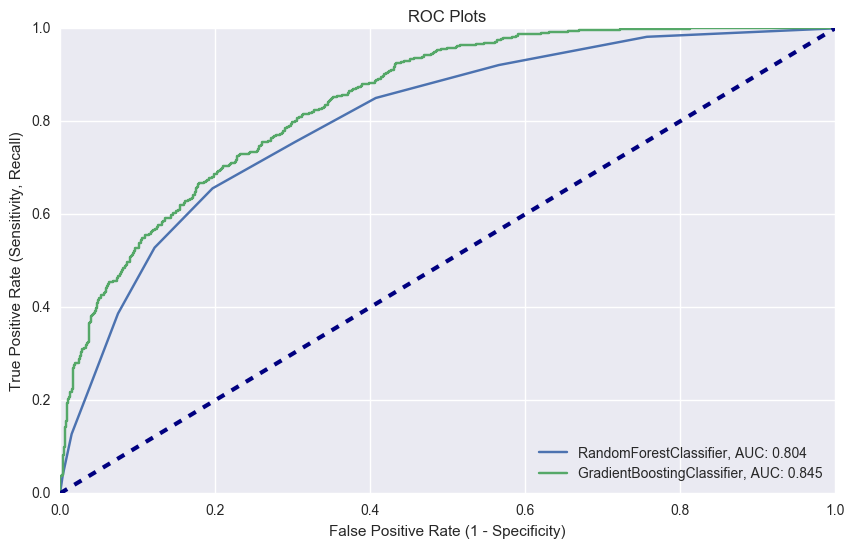

In [46]:
clfs.plot_roc_curve(X_test,y_test['November'])

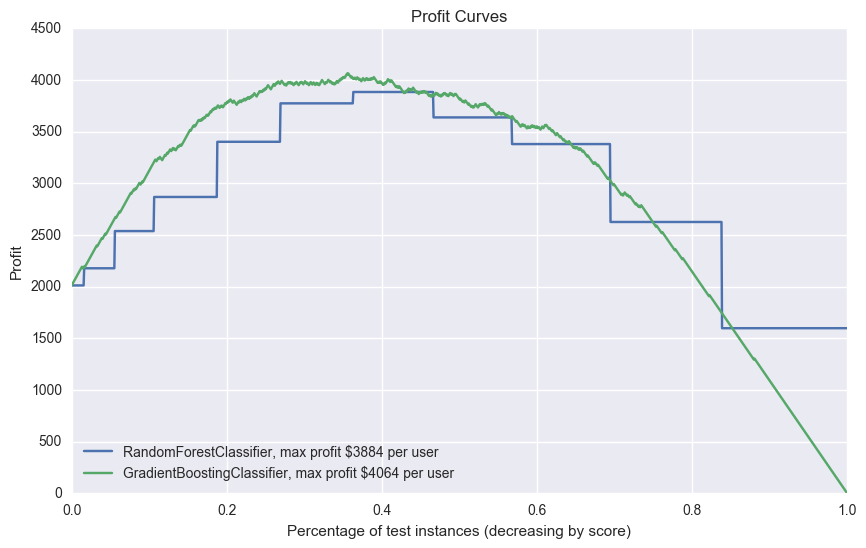

In [47]:
# The values in costbenefit matrix are imaginery and does not resemble any real life data
costbenefit_mat = np.array([[0, 0],
                            [-10,8]])
                            
clfs.plot_profit_curve(costbenefit_mat, X_test, y_test['November'])


Thresh=0.000, n=84, Accuracy: 0.7637564196625092 
 AUC: 84.4693281402142
Thresh=0.000, n=84, Accuracy: 0.7637564196625092 
 AUC: 84.45465260921623
Thresh=0.000, n=84, Accuracy: 0.7637564196625092 
 AUC: 84.44603364656662
Thresh=0.000, n=84, Accuracy: 0.7637564196625092 
 AUC: 84.44976076555024
Thresh=0.000, n=84, Accuracy: 0.7637564196625092 
 AUC: 84.46420335161176
Thresh=0.000, n=84, Accuracy: 0.7637564196625092 
 AUC: 84.4560502788351
Thresh=0.000, n=78, Accuracy: 0.7637564196625092 
 AUC: 84.46327157186585
Thresh=0.000, n=77, Accuracy: 0.7637564196625092 
 AUC: 84.4579138383269
Thresh=0.001, n=76, Accuracy: 0.7637564196625092 
 AUC: 84.46536807629414
Thresh=0.001, n=75, Accuracy: 0.768892149669846 
 AUC: 84.74280549563694
Thresh=0.001, n=74, Accuracy: 0.7666911225238444 
 AUC: 84.97877871628704
Thresh=0.001, n=73, Accuracy: 0.7593543653705063 
 AUC: 84.59674902046655
Thresh=0.002, n=72, Accuracy: 0.7593543653705063 
 AUC: 84.59395368122883
Thresh=0.002, n=71, Accuracy: 0.7630227439

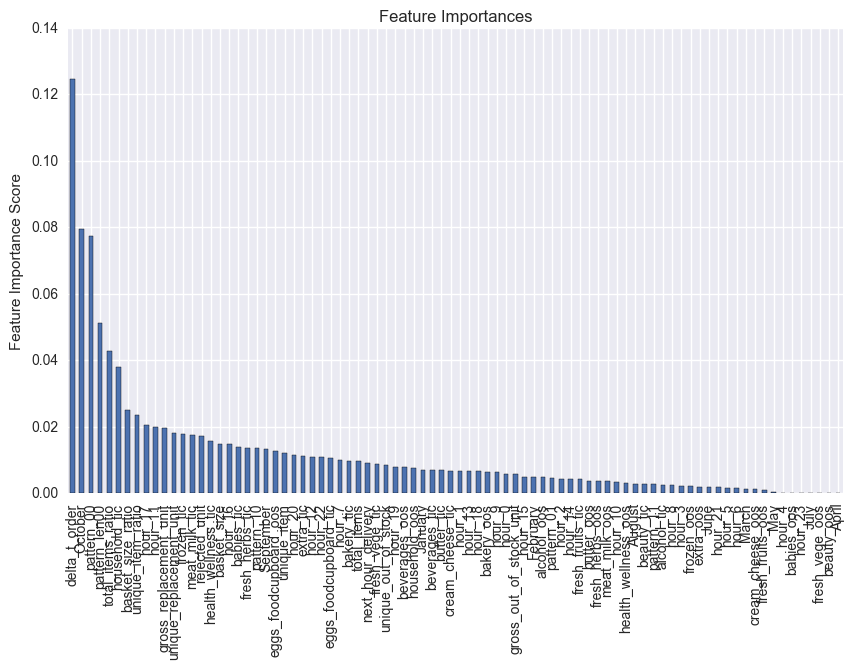

In [48]:
# We are going to perform feature selection wih Gradient Boosting
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
gbc.fit(X_train,y_train['November'])
thresholds = np.sort(gbc.feature_importances_)

for thresh in thresholds:
    
    # select features using threshold
    
    selection = SelectFromModel(gbc, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train)
    
    # train model
    selection_model = GradientBoostingClassifier()
    selection_model.fit(select_X_train, y_train['November'])
    
    # eval model
    select_X_test = selection.transform(X_test)
    y_pred = selection_model.predict(select_X_test)
    y_proba = selection_model.predict_proba(select_X_test)[:,1]
    auc_roc = roc_auc_score(y_test['November'], y_proba)
    accuracy = accuracy_score(y_test['November'],y_pred)
    print("Thresh={:.3f}, n={}, Accuracy: {} \n AUC: {}".format(thresh, select_X_train.shape[1],accuracy, auc_roc*100.0))
  

fig= plt.figure(figsize=(10,6))
feat_imp_gbc = pd.Series(gbc.feature_importances_,
                     X_train.columns.tolist()).sort_values(ascending=False)
feat_imp_gbc.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')

plt.show()

In [49]:
# Train a general GBC to select the important features

sfm = SelectFromModel(gbc, threshold=0.049)
sfm.fit(X_train,y_train['November'])
X_train_t = sfm.transform(X_train)
X_test_t = sfm.transform(X_test)

# Train a new classifier using only the selected features

param_test = {'n_estimators':list(range(30,120,10))}
gbc_grid = GridSearchCV(GradientBoostingClassifier( learning_rate = 0.1, min_samples_split=5, max_depth=5,
     random_state=7), param_grid=param_test, scoring='accuracy',cv=10)
gbc_grid.fit(X_train_t, y_train['November'])

gbc_grid.grid_scores_, gbc_grid.best_params_, gbc_grid.best_score_

# Tuning GBC with GridSearchCv
#min_samples_split : This should be ~0.5-1% of total values
#min_samples_leaf : This  is just used for overfitting prevention and
#                   again a small value because of imbalanced class
#max_depth : should be chosen (5-8) based on the number of observations
#max_features : 'sqrt' General thumb rule to start with square root
#subsample : 0.8 this is a commonly used start value



([mean: 0.77332, std: 0.01994, params: {'n_estimators': 30},
  mean: 0.76681, std: 0.02401, params: {'n_estimators': 40},
  mean: 0.76030, std: 0.02456, params: {'n_estimators': 50},
  mean: 0.75777, std: 0.02708, params: {'n_estimators': 60},
  mean: 0.75994, std: 0.02244, params: {'n_estimators': 70},
  mean: 0.75597, std: 0.02381, params: {'n_estimators': 80},
  mean: 0.75597, std: 0.02269, params: {'n_estimators': 90},
  mean: 0.75741, std: 0.02248, params: {'n_estimators': 100},
  mean: 0.75633, std: 0.02034, params: {'n_estimators': 110}],
 {'n_estimators': 30},
 0.7733188720173536)

In [50]:
param_test= {'n_estimators': [10,50,100,200], 'min_samples_leaf':[1,2,4]}

rf_grid = GridSearchCV(RandomForestClassifier(random_state=67,max_depth=5, min_samples_split=5), param_grid = param_test, 
                       scoring='accuracy', cv=10)
rf_grid.fit(X_train_t, y_train['November'])
rf_grid.grid_scores_, rf_grid.best_params_, rf_grid.best_score_


([mean: 0.76645, std: 0.01832, params: {'min_samples_leaf': 1, 'n_estimators': 10},
  mean: 0.76681, std: 0.01818, params: {'min_samples_leaf': 1, 'n_estimators': 50},
  mean: 0.76103, std: 0.01541, params: {'min_samples_leaf': 1, 'n_estimators': 100},
  mean: 0.76392, std: 0.01687, params: {'min_samples_leaf': 1, 'n_estimators': 200},
  mean: 0.76573, std: 0.01922, params: {'min_samples_leaf': 2, 'n_estimators': 10},
  mean: 0.76609, std: 0.01829, params: {'min_samples_leaf': 2, 'n_estimators': 50},
  mean: 0.76175, std: 0.01513, params: {'min_samples_leaf': 2, 'n_estimators': 100},
  mean: 0.76464, std: 0.01696, params: {'min_samples_leaf': 2, 'n_estimators': 200},
  mean: 0.76645, std: 0.01938, params: {'min_samples_leaf': 4, 'n_estimators': 10},
  mean: 0.76573, std: 0.01895, params: {'min_samples_leaf': 4, 'n_estimators': 50},
  mean: 0.76139, std: 0.01874, params: {'min_samples_leaf': 4, 'n_estimators': 100},
  mean: 0.76392, std: 0.01734, params: {'min_samples_leaf': 4, 'n_estim

In [51]:
gbc_param = { 'learning_rate' : 0.1,
             'min_samples_split' : 5,
             'max_depth' : 5,
             'random_state' : 7,
             'n_estimators' : 30,
             }

rf_param = { 'n_estimators':50,
             'min_samples_leaf':1,
             'max_depth':5,
             'min_samples_split':5,
             }

rf_tuned = RandomForestClassifier(**rf_param)
gbc_tuned = GradientBoostingClassifier(**gbc_param)

In [52]:
clfs_tuned = Classifiers([gbc_tuned, rf_tuned])

In [53]:
clfs_tuned.create_pipelines()

In [54]:
clfs_tuned.train(X_train_t,y_train['November'])

In [55]:
clfs_tuned.accuracy_scores(X_test_t, y_test['November'])

                   Classifier  Accuracy
0  GradientBoostingClassifier  0.765957
1      RandomForestClassifier  0.768158


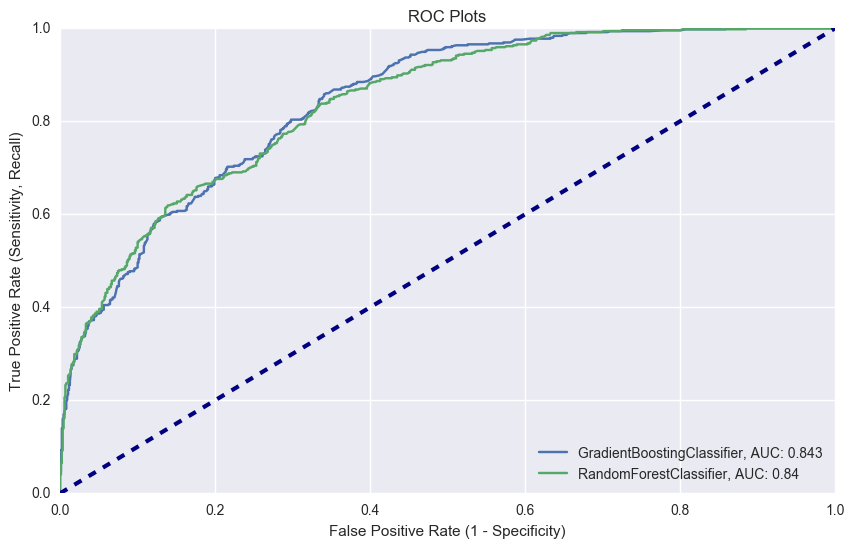

In [56]:
clfs_tuned.plot_roc_curve(X_test_t, y_test['November'])